#### CSE 9099o Final Hackathon Batch 81 A _Robust Yield Prediction

**Name :** Sai Vivek Kanukuntla    **Enrollment_Id :** 3679

# Data Cleaning and Preprocessing -

### Import all the required libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Necessary Imports
import os
import pandas as pd
import numpy as np
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Set the Working Directory

Reading the Datasets from the given path

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/final hackathon/train_data.csv", nrows=1000000)
train_weather = pd.read_csv("/content/drive/MyDrive/final hackathon/train_weather-1646897968670.csv")
farm_data = pd.read_csv("/content/drive/MyDrive/final hackathon/farm_data-1646897931981.csv")

In [ ]:
train_data.dtypes

date                object
farm_id             object
ingredient_type     object
yield              float64
dtype: object

In [ ]:
train_data.nunique()

date                  436
farm_id              1416
ingredient_type         4
yield              278612
dtype: int64

In [ ]:
train_data.head()

,date,farm_id,ingredient_type,yield
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,0.0


In [ ]:
train_data.tail()

,date,farm_id,ingredient_type,yield
999995,2016-01-19 03:00:00,fid_102706,ing_x,22.9297
999996,2016-01-19 03:00:00,fid_102706,ing_z,1050.9600
999997,2016-01-19 03:00:00,fid_47093,ing_w,65.6562
999998,2016-01-19 03:00:00,fid_47093,ing_x,0.0000
999999,2016-01-19 03:00:00,fid_47093,ing_y,867.3520


In [ ]:
train_data['ingredient_type'].nunique()

4

In [ ]:
farm_data

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369
1,fid_90053,2004.0,NaN,252.696160,Obery Farms,location 7369
2,fid_17537,1991.0,NaN,499.446528,Obery Farms,location 7369
3,fid_110392,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,fid_62402,1975.0,NaN,10833.140121,Obery Farms,location 7369
...,...,...,...,...,...,...
1444,fid_41664,1914.0,NaN,1822.663957,Sanderson Farms,location 5150
1445,fid_14529,NaN,NaN,399.297094,Obery Farms,location 5150
1446,fid_46454,1997.0,NaN,1046.552295,Sanderson Farms,location 5150
1447,fid_24103,2001.0,NaN,2766.186825,Dole Food Company,location 5150


In [ ]:
farm_data.head()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369
1,fid_90053,2004.0,NaN,252.696160,Obery Farms,location 7369
2,fid_17537,1991.0,NaN,499.446528,Obery Farms,location 7369
3,fid_110392,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,fid_62402,1975.0,NaN,10833.140121,Obery Farms,location 7369


In [ ]:
farm_data.dtypes

farm_id                        object
operations_commencing_year    float64
num_processing_plants         float64
farm_area                     float64
farming_company                object
deidentified_location          object
dtype: object

In [ ]:
train_weather

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,location 7369,24.4,NaN,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,location 7369,22.8,2.0,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,location 7369,21.1,2.0,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,location 7369,20.0,2.0,250.0,20.0,1020.0,-1.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,2016-12-31 19:00:00,location 5150,3.0,NaN,180.0,-8.0,NaN,NaN,5.7
139769,2016-12-31 20:00:00,location 5150,2.8,2.0,180.0,-8.9,1007.4,NaN,7.7
139770,2016-12-31 21:00:00,location 5150,2.8,NaN,180.0,-7.2,1007.5,NaN,5.1
139771,2016-12-31 22:00:00,location 5150,2.2,NaN,170.0,-6.7,1008.0,NaN,4.6


In [ ]:
train_weather.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,location 7369,24.4,NaN,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,location 7369,22.8,2.0,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,location 7369,21.1,2.0,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,location 7369,20.0,2.0,250.0,20.0,1020.0,-1.0,2.6


In [ ]:
train_weather.dtypes

timestamp                 object
deidentified_location     object
temp_obs                 float64
cloudiness               float64
wind_direction           float64
dew_temp                 float64
pressure_sea_level       float64
precipitation            float64
wind_speed               float64
dtype: object

Visualizations with the Target Variable

In [ ]:
sns.set_style("whitegrid")
sns.set_context("poster")

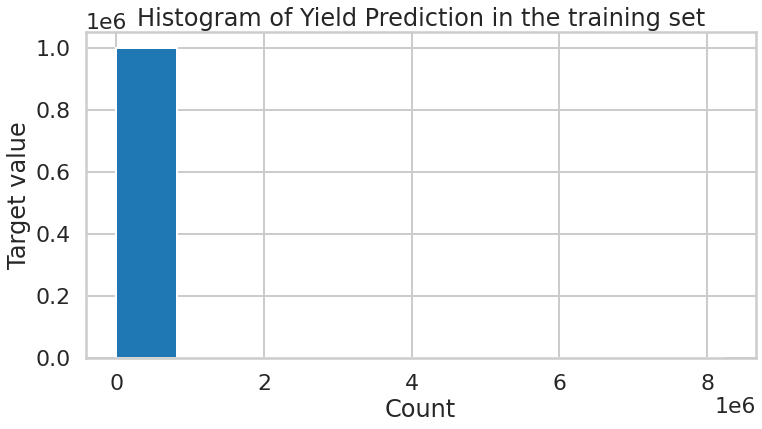

In [ ]:
plt.figure(figsize = (12, 6))
plt.hist(train_data['yield'])
plt.title('Histogram of Yield Prediction in the training set')
plt.xlabel('Count')
plt.ylabel('Target value')
plt.show()

### Data Cleansing

Train Data -

In [ ]:
#Convert date Object to datetime format
train_data['date'] = pd.to_datetime(train_data['date'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
#Type Conversion
train_data['farm_id'] = train_data['farm_id'].astype('str')

In [ ]:
#Check for duplicates
train_data.duplicated(subset=None, keep= 'first').sum()

0

In [ ]:
#Drop duplicates
train_data1 = train_data.drop_duplicates(subset=None, keep= 'first', inplace=False, ignore_index=False)

Farm Data -

In [ ]:
#Drop 'operations_commencing_year' column from the farm data
farm_data.drop('operations_commencing_year', axis=1, inplace=True)

In [ ]:
#Type Casting
farm_data['farm_id'] = farm_data['farm_id'].astype('str')

In [ ]:
#Check for Null Values
farm_data.isnull().sum()

farm_id                     0
num_processing_plants    1094
farm_area                   0
farming_company             0
deidentified_location       0
dtype: int64

In [ ]:
#Fill missing values with median
farm_data['num_processing_plants'].fillna(farm_data['num_processing_plants'].median(), inplace=True)


In [ ]:
#Type Conversion
farm_data['num_processing_plants'] = farm_data['num_processing_plants'].astype('int64')

Weather Data -

In [ ]:
#Convert date Object to datetime format
train_weather['timestamp'] = pd.to_datetime(train_weather['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
#Dropping 'cloudiness' column
train_weather.drop('cloudiness', axis = 1, inplace =  True)

### Merging the Datasets

In [ ]:
#Merging train_data and farm_data on 'farm_id' column
train_data_merged = pd.merge(train_data1,farm_data, on = 'farm_id')

In [ ]:
train_data_merged.head()

,date,farm_id,ingredient_type,yield,num_processing_plants,farm_area,farming_company,deidentified_location
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369
1,2016-01-01 01:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369
2,2016-01-01 02:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369
3,2016-01-01 03:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369
4,2016-01-01 04:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369


In [ ]:
#Renaming date column as timestamp
train_data_merged.rename(columns = {'date':'timestamp'},inplace = True)

In [ ]:
#Check for Value counts
train_weather.deidentified_location.value_counts()

location 7369    8784
location 5677    8784
location 5489    8783
location 5833    8783
location 2532    8783
location 565     8782
location 1784    8782
location 5290    8780
location 8421    8780
location 5410    8777
location 959     8763
location 6364    8755
location 7048    8755
location 4525    8614
location 868     8614
location 5150    8454
Name: deidentified_location, dtype: int64

In [ ]:
#Drop deidentified_location column from the merged dataset
train_data_merged.drop('deidentified_location', axis=1, inplace=True)

In [ ]:
train_data_merged.shape

(1018901, 7)

In [ ]:
train_weather.shape

(139773, 8)

In [ ]:
train_data_merged.isnull().sum()

timestamp                0
farm_id                  0
ingredient_type          0
yield                    0
num_processing_plants    0
farm_area                0
farming_company          0
dtype: int64

In [ ]:
train_data_merged.nunique()

timestamp                   436
farm_id                    1416
ingredient_type               4
yield                    278612
num_processing_plants        18
farm_area                  1380
farming_company              16
dtype: int64

In [ ]:
train_data_merged.ingredient_type.value_counts(normalize = True)*100

ing_w    60.436294
ing_x    19.775327
ing_y    13.528007
ing_z     6.260373
Name: ingredient_type, dtype: float64

In [ ]:
train_data_merged.farming_company.value_counts(normalize = True)*100

Obery Farms                            40.301462
Wayne Farms                            21.622905
Sanderson Farms                        11.088712
Dole Food Company                      10.684257
Del Monte Foods                         8.444000
Foster Farms                            2.073116
Other                                   1.124545
Freight Farms                           1.026891
Monogram Foods                          0.616056
Perdue Farms                            0.555697
Mountaire Farms                         0.539797
Tyson Foods                             0.513494
Northland Organic Foods Corporation     0.470114
West Liberty Foods                      0.426145
Kansas Ville Farms                      0.299048
Southern Confederate Farms              0.213760
Name: farming_company, dtype: float64

In [ ]:
train_weather.nunique()

timestamp                8784
deidentified_location      16
temp_obs                  619
wind_direction             43
dew_temp                  522
pressure_sea_level        709
precipitation             128
wind_speed                 58
dtype: int64

In [ ]:
train_weather.head()

,timestamp,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,location 7369,25.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,location 7369,24.4,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,location 7369,22.8,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,location 7369,21.1,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,location 7369,20.0,250.0,20.0,1020.0,-1.0,2.6


In [ ]:
train_weather.dtypes

timestamp                datetime64[ns]
deidentified_location            object
temp_obs                        float64
wind_direction                  float64
dew_temp                        float64
pressure_sea_level              float64
precipitation                   float64
wind_speed                      float64
dtype: object

In [ ]:
#Drop 'timestamp' from weather data
train_weather.drop('timestamp', axis=1, inplace=True)

In [ ]:
train_weather.shape

(139773, 7)

In [ ]:
train_data_merged.shape

(1018901, 7)

In [ ]:
#Final Merged Dataset
train_final_merged = pd.merge(train_data_merged,train_weather,left_index = True, right_index = True)

In [ ]:
train_final_merged.nunique()

timestamp                  436
farm_id                    219
ingredient_type              3
yield                    33444
num_processing_plants       14
farm_area                  202
farming_company             12
deidentified_location       16
temp_obs                   619
wind_direction              43
dew_temp                   522
pressure_sea_level         709
precipitation              128
wind_speed                  58
dtype: int64

In [ ]:
train_final_merged.ingredient_type.value_counts(normalize = True)*100

ing_w    70.024969
ing_x    16.321464
ing_z    13.653567
Name: ingredient_type, dtype: float64

In [ ]:
train_final_merged.farming_company.value_counts(normalize = True)*100

Obery Farms                   44.697474
Wayne Farms                   19.827148
Dole Food Company             17.744486
Sanderson Farms                4.638235
Del Monte Foods                4.054431
Freight Farms                  2.807409
Tyson Foods                    2.495475
Other                          1.247737
Perdue Farms                   0.935803
Mountaire Farms                0.623869
Foster Farms                   0.615999
Southern Confederate Farms     0.311934
Name: farming_company, dtype: float64

In [ ]:
train_final_merged.deidentified_location.value_counts(normalize = True)*100

location 7369    6.284476
location 5677    6.284476
location 5489    6.283760
location 5833    6.283760
location 2532    6.283760
location 565     6.283045
location 1784    6.283045
location 5290    6.281614
location 8421    6.281614
location 5410    6.279467
location 959     6.269451
location 6364    6.263728
location 7048    6.263728
location 4525    6.162850
location 868     6.162850
location 5150    6.048378
Name: deidentified_location, dtype: float64

In [ ]:
train_final_merged.shape

(139773, 14)

In [ ]:
train_final_merged.isnull().sum()

timestamp                    0
farm_id                      0
ingredient_type              0
yield                        0
num_processing_plants        0
farm_area                    0
farming_company              0
deidentified_location        0
temp_obs                    55
wind_direction            6268
dew_temp                   113
pressure_sea_level       10618
precipitation            50289
wind_speed                 304
dtype: int64

In [ ]:
train_final_merged.head()

,timestamp,farm_id,ingredient_type,yield,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369,24.4,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369,22.8,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369,21.1,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369,20.0,250.0,20.0,1020.0,-1.0,2.6


In [ ]:
train_final_merged.tail()

,timestamp,farm_id,ingredient_type,yield,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
139768,2016-01-17 19:00:00,fid_105851,ing_z,140.674,7,18984.635147,Obery Farms,location 5150,3.0,180.0,-8.0,NaN,NaN,5.7
139769,2016-01-17 20:00:00,fid_105851,ing_w,427.720,7,18984.635147,Obery Farms,location 5150,2.8,180.0,-8.9,1007.4,NaN,7.7
139770,2016-01-17 20:00:00,fid_105851,ing_x,570.398,7,18984.635147,Obery Farms,location 5150,2.8,180.0,-7.2,1007.5,NaN,5.1
139771,2016-01-17 20:00:00,fid_105851,ing_z,149.466,7,18984.635147,Obery Farms,location 5150,2.2,170.0,-6.7,1008.0,NaN,4.6
139772,2016-01-17 21:00:00,fid_105851,ing_w,419.880,7,18984.635147,Obery Farms,location 5150,1.7,180.0,-5.6,1008.5,-1.0,8.8


In [ ]:
train_final_merged.drop('farm_id', axis=1, inplace=True)

In [ ]:
train_final_merged.head()

,timestamp,ingredient_type,yield,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,24.4,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,22.8,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,21.1,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,20.0,250.0,20.0,1020.0,-1.0,2.6


In [ ]:
train_final_merged.tail()

,timestamp,ingredient_type,yield,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
139768,2016-01-17 19:00:00,ing_z,140.674,7,18984.635147,Obery Farms,location 5150,3.0,180.0,-8.0,NaN,NaN,5.7
139769,2016-01-17 20:00:00,ing_w,427.720,7,18984.635147,Obery Farms,location 5150,2.8,180.0,-8.9,1007.4,NaN,7.7
139770,2016-01-17 20:00:00,ing_x,570.398,7,18984.635147,Obery Farms,location 5150,2.8,180.0,-7.2,1007.5,NaN,5.1
139771,2016-01-17 20:00:00,ing_z,149.466,7,18984.635147,Obery Farms,location 5150,2.2,170.0,-6.7,1008.0,NaN,4.6
139772,2016-01-17 21:00:00,ing_w,419.880,7,18984.635147,Obery Farms,location 5150,1.7,180.0,-5.6,1008.5,-1.0,8.8


In [ ]:
#Calculating Hour difference between the timestamps
train_final_merged['Hours'] = train_final_merged['timestamp'].dt.hour

In [ ]:
#train_final_merged['Minutes'] = train_final_merged['timestamp'].dt.minute

In [ ]:
#train_final_merged['Seconds'] = train_final_merged['timestamp'].dt.second

In [ ]:
train_final_merged['timestamp'].min(), train_final_merged['timestamp'].max(), (train_final_merged['timestamp'].max() -train_final_merged['timestamp'].min())

(Timestamp('2016-01-01 00:00:00'),
 Timestamp('2016-01-19 03:00:00'),
 Timedelta('18 days 03:00:00'))

Unix time is a system for describing a point in time. It is the number of seconds that have elapsed since the Unix epoch

In [ ]:
#Converting Timestamp to integer
train_final_merged['Unix Sec'] = pd.to_datetime(train_final_merged['timestamp']).astype(int)/ 10**9

In [ ]:
train_final_merged.head()

,timestamp,ingredient_type,yield,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Hours,Unix Sec
0,2016-01-01 00:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,NaN,0.0,0,1.451606e+09
1,2016-01-01 01:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,24.4,70.0,21.1,1020.2,-1.0,1.5,1,1.451610e+09
2,2016-01-01 02:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,22.8,0.0,21.1,1020.2,0.0,0.0,2,1.451614e+09
3,2016-01-01 03:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,21.1,0.0,20.6,1020.1,0.0,0.0,3,1.451617e+09
4,2016-01-01 04:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,20.0,250.0,20.0,1020.0,-1.0,2.6,4,1.451621e+09


In [ ]:
train_final_merged.dtypes

timestamp                datetime64[ns]
ingredient_type                  object
yield                           float64
num_processing_plants             int64
farm_area                       float64
farming_company                  object
deidentified_location            object
temp_obs                        float64
wind_direction                  float64
dew_temp                        float64
pressure_sea_level              float64
precipitation                   float64
wind_speed                      float64
Hours                             int64
Unix Sec                        float64
dtype: object

In [ ]:
#Type Conversion float to int
train_final_merged['Unix Sec'] = train_final_merged['Unix Sec'].astype('int64')

In [ ]:
train_final_merged.dtypes

timestamp                datetime64[ns]
ingredient_type                  object
yield                           float64
num_processing_plants             int64
farm_area                       float64
farming_company                  object
deidentified_location            object
temp_obs                        float64
wind_direction                  float64
dew_temp                        float64
pressure_sea_level              float64
precipitation                   float64
wind_speed                      float64
Hours                             int64
Unix Sec                          int64
dtype: object

In [ ]:
train_final_merged.drop('timestamp', axis=1, inplace=True)

###  Practices in  Data Cleaning -

* I have cleaned the data by checking for duplicate values and dropped them from that trainset.

* Performed Type casting on the columns respectively wherever needed and also checked for misssing values in the data.


* Determined if all of the columns in test exist in train, and vice versa w.r.t target,
Did some initial plotting .

* Merged all the three datasets into the final training set which is given to the model to learn and can predict on much larger data.

* To save complexity , removed/dropped few columns from the data .

### Label Encoding for Categorical Columns

In [ ]:
#Necessary Import
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
train_final_merged.farming_company = le.fit_transform(train_final_merged.farming_company)

In [ ]:
train_final_merged['farming_company'] = train_final_merged['farming_company'].astype('category')

In [ ]:
train_final_merged.deidentified_location = le.fit_transform(train_final_merged.deidentified_location)

In [ ]:
train_final_merged['deidentified_location'] = train_final_merged['deidentified_location'].astype('category')

In [ ]:
train_final_merged.ingredient_type = le.fit_transform(train_final_merged.ingredient_type)

In [ ]:
train_final_merged['ingredient_type'] = train_final_merged['ingredient_type'].astype('category')

In [ ]:
train_final_merged.dtypes

ingredient_type          category
yield                     float64
num_processing_plants       int64
farm_area                 float64
farming_company          category
deidentified_location    category
temp_obs                  float64
wind_direction            float64
dew_temp                  float64
pressure_sea_level        float64
precipitation             float64
wind_speed                float64
Hours                       int64
Unix Sec                    int64
dtype: object

In [ ]:
train_final_merged.nunique()

ingredient_type              3
yield                    33444
num_processing_plants       14
farm_area                  202
farming_company             12
deidentified_location       16
temp_obs                   619
wind_direction              43
dew_temp                   522
pressure_sea_level         709
precipitation              128
wind_speed                  58
Hours                       24
Unix Sec                   436
dtype: int64

In [ ]:
train_final_merged.farming_company.value_counts()

5     62475
11    27713
1     24802
8      6483
0      5667
3      3924
10     3488
6      1744
7      1308
4       872
2       861
9       436
Name: farming_company, dtype: int64

In [ ]:
train_final_merged.head()

,ingredient_type,yield,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Hours,Unix Sec
0,0,0.0,7,690.455096,5,12,25.0,0.0,20.0,1019.7,NaN,0.0,0,1451606400
1,0,0.0,7,690.455096,5,12,24.4,70.0,21.1,1020.2,-1.0,1.5,1,1451610000
2,0,0.0,7,690.455096,5,12,22.8,0.0,21.1,1020.2,0.0,0.0,2,1451613600
3,0,0.0,7,690.455096,5,12,21.1,0.0,20.6,1020.1,0.0,0.0,3,1451617200
4,0,0.0,7,690.455096,5,12,20.0,250.0,20.0,1020.0,-1.0,2.6,4,1451620800


In [ ]:
train_final_merged.deidentified_location.value_counts()

8     8784
12    8784
1     8783
6     8783
9     8783
0     8782
7     8782
4     8780
13    8780
5     8777
15    8763
10    8755
11    8755
2     8614
14    8614
3     8454
Name: deidentified_location, dtype: int64

In [ ]:
train_final_merged.ingredient_type.value_counts()

0    97876
1    22813
2    19084
Name: ingredient_type, dtype: int64

In [ ]:
train_final_merged.nunique()

ingredient_type              3
yield                    33444
num_processing_plants       14
farm_area                  202
farming_company             12
deidentified_location       16
temp_obs                   619
wind_direction              43
dew_temp                   522
pressure_sea_level         709
precipitation              128
wind_speed                  58
Hours                       24
Unix Sec                   436
dtype: int64

In [ ]:
#Descriptive Stats of Final Dataset
train_final_merged.describe()

,yield,num_processing_plants,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Hours,Unix Sec
count,139773.000000,139773.000000,139773.000000,139718.000000,133505.000000,139660.000000,129155.000000,89484.000000,139469.000000,139773.000000,1.397730e+05
mean,92.340845,7.757950,8774.498059,14.418106,180.526632,7.350158,1016.158038,0.983047,3.560527,11.415796,1.452389e+09
std,157.191482,1.927304,9079.009116,10.626595,111.523629,9.790235,7.629684,8.463678,2.335874,6.953239,4.527635e+05
min,0.000000,5.000000,26.291549,-28.900000,0.000000,-35.000000,968.200000,-1.000000,0.000000,0.000000,1.451606e+09
25%,0.000000,7.000000,2875.254947,7.200000,80.000000,0.600000,1011.800000,0.000000,2.100000,5.000000,1.451995e+09
50%,24.256600,7.000000,5948.021672,15.000000,190.000000,8.300000,1016.400000,0.000000,3.100000,11.000000,1.452388e+09
75%,117.760000,7.000000,11389.164576,22.200000,280.000000,14.400000,1020.800000,0.000000,5.000000,17.000000,1.452780e+09
max,1398.650000,20.000000,51394.868630,47.200000,360.000000,26.100000,1045.500000,343.000000,19.000000,23.000000,1.453172e+09


In [ ]:
#Check for null values in the merged dataset
train_final_merged.isnull().sum()

ingredient_type              0
yield                        0
num_processing_plants        0
farm_area                    0
farming_company              0
deidentified_location        0
temp_obs                    55
wind_direction            6268
dew_temp                   113
pressure_sea_level       10618
precipitation            50289
wind_speed                 304
Hours                        0
Unix Sec                     0
dtype: int64

In [ ]:
train_final_merged.dtypes

ingredient_type          category
yield                     float64
num_processing_plants       int64
farm_area                 float64
farming_company          category
deidentified_location    category
temp_obs                  float64
wind_direction            float64
dew_temp                  float64
pressure_sea_level        float64
precipitation             float64
wind_speed                float64
Hours                       int64
Unix Sec                    int64
dtype: object

In [ ]:
train_final_merged.drop('Hours', axis=1, inplace=True)

In [ ]:
train_final_merged.num_processing_plants.value_counts()

7     111872
10      6538
12      4796
11      3488
8       3487
9       3052
13      2180
5        872
14       872
17       872
20       436
15       436
16       436
6        436
Name: num_processing_plants, dtype: int64

In [ ]:
train_final_merged.head()

,ingredient_type,yield,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec
0,0,0.0,7,690.455096,5,12,25.0,0.0,20.0,1019.7,NaN,0.0,1451606400
1,0,0.0,7,690.455096,5,12,24.4,70.0,21.1,1020.2,-1.0,1.5,1451610000
2,0,0.0,7,690.455096,5,12,22.8,0.0,21.1,1020.2,0.0,0.0,1451613600
3,0,0.0,7,690.455096,5,12,21.1,0.0,20.6,1020.1,0.0,0.0,1451617200
4,0,0.0,7,690.455096,5,12,20.0,250.0,20.0,1020.0,-1.0,2.6,1451620800


In [ ]:
#Seperated the numeric columns from the final merged dataset
num_col = ['yield','farm_area','temp_obs', 'wind_direction', 'dew_temp', 'pressure_sea_level',
       'precipitation', 'wind_speed','Unix Sec']

In [ ]:
num_col

['yield',
 'farm_area',
 'temp_obs',
 'wind_direction',
 'dew_temp',
 'pressure_sea_level',
 'precipitation',
 'wind_speed',
 'Unix Sec']

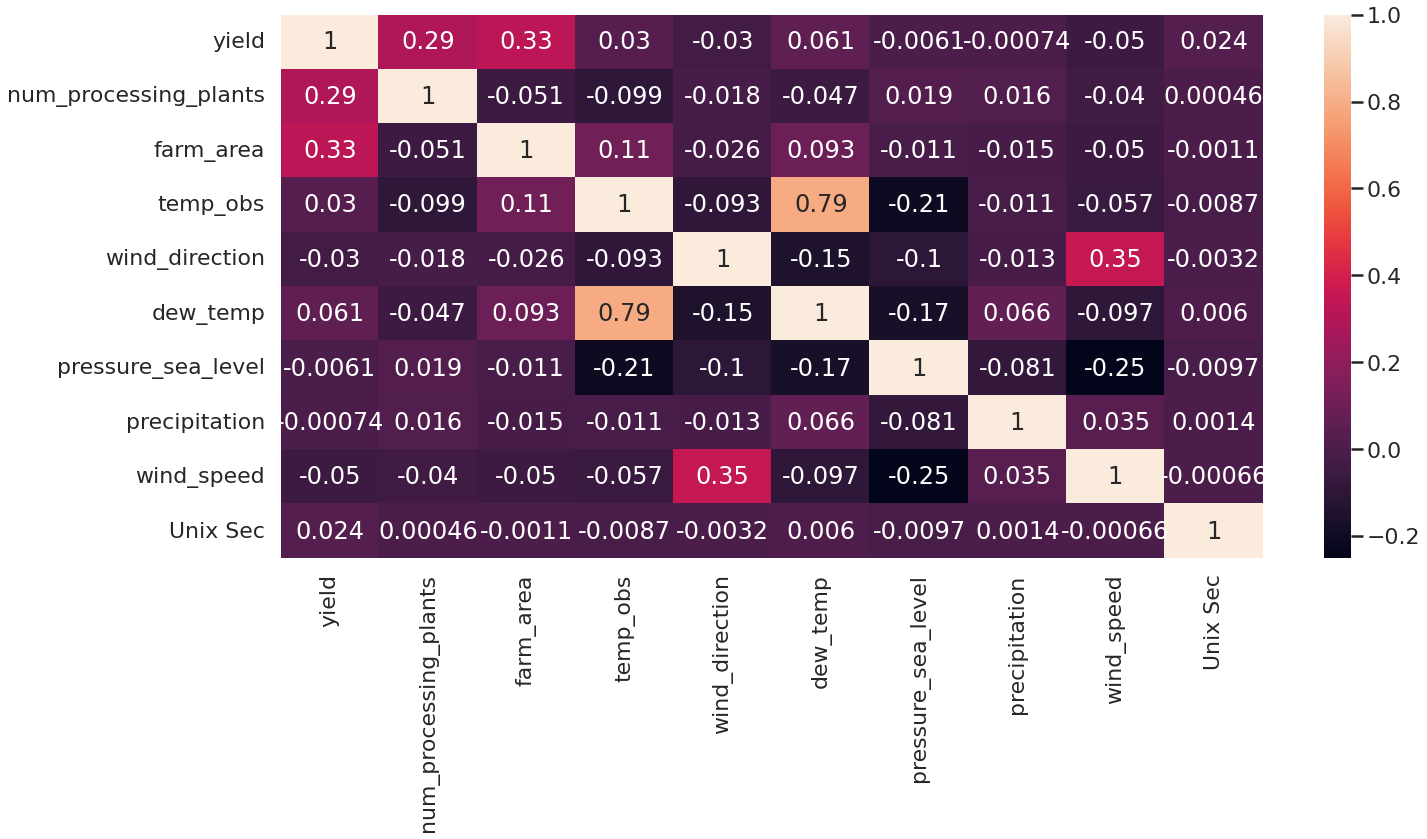

In [ ]:
#Correlation Plot on the numeric data
plt.figure(figsize=(22,10))
data = train_final_merged

df = pd.DataFrame(data)

corrMatrix = df.corr(method = 'pearson',min_periods = 1)
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Imputing the Numeric Columns

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
#Imputation
num_imputer = SimpleImputer(strategy = 'median')

imputed_data = pd.DataFrame(num_imputer.fit_transform(train_final_merged[num_col]),
                               columns = num_col)

In [ ]:
imputed_data.dtypes

yield                 float64
farm_area             float64
temp_obs              float64
wind_direction        float64
dew_temp              float64
pressure_sea_level    float64
precipitation         float64
wind_speed            float64
Unix Sec              float64
dtype: object

In [ ]:
imputed_data.head()

,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec
0,0.0,690.455096,25.0,0.0,20.0,1019.7,0.0,0.0,1.451606e+09
1,0.0,690.455096,24.4,70.0,21.1,1020.2,-1.0,1.5,1.451610e+09
2,0.0,690.455096,22.8,0.0,21.1,1020.2,0.0,0.0,1.451614e+09
3,0.0,690.455096,21.1,0.0,20.6,1020.1,0.0,0.0,1.451617e+09
4,0.0,690.455096,20.0,250.0,20.0,1020.0,-1.0,2.6,1.451621e+09


In [ ]:
imputed_data.tail()

,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec
139768,140.674,18984.635147,3.0,180.0,-8.0,1016.4,0.0,5.7,1.453057e+09
139769,427.720,18984.635147,2.8,180.0,-8.9,1007.4,0.0,7.7,1.453061e+09
139770,570.398,18984.635147,2.8,180.0,-7.2,1007.5,0.0,5.1,1.453061e+09
139771,149.466,18984.635147,2.2,170.0,-6.7,1008.0,0.0,4.6,1.453061e+09
139772,419.880,18984.635147,1.7,180.0,-5.6,1008.5,-1.0,8.8,1.453064e+09


In [ ]:
#Type Conversions
col = ['temp_obs','dew_temp','wind_speed','wind_direction','Unix Sec','farm_area']

imputed_data[col] = imputed_data[col].astype('int64')

In [ ]:
imputed_data.head()

,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec
0,0.0,690,25,0,20,1019.7,0.0,0,1451606400
1,0.0,690,24,70,21,1020.2,-1.0,1,1451610000
2,0.0,690,22,0,21,1020.2,0.0,0,1451613600
3,0.0,690,21,0,20,1020.1,0.0,0,1451617200
4,0.0,690,20,250,20,1020.0,-1.0,2,1451620800


In [ ]:
imputed_data.tail()

,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec
139768,140.674,18984,3,180,-8,1016.4,0.0,5,1453057200
139769,427.720,18984,2,180,-8,1007.4,0.0,7,1453060800
139770,570.398,18984,2,180,-7,1007.5,0.0,5,1453060800
139771,149.466,18984,2,170,-6,1008.0,0.0,4,1453060800
139772,419.880,18984,1,180,-5,1008.5,-1.0,8,1453064400


In [ ]:
imputed_data.dtypes

yield                 float64
farm_area               int64
temp_obs                int64
wind_direction          int64
dew_temp                int64
pressure_sea_level    float64
precipitation         float64
wind_speed              int64
Unix Sec                int64
dtype: object

In [ ]:
imputed_data.shape

(139773, 9)

In [ ]:
imputed_data.insert(0, 'id', imputed_data.index)

In [ ]:
imputed_data.head()

,id,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec
0,0,0.0,690,25,0,20,1019.7,0.0,0,1451606400
1,1,0.0,690,24,70,21,1020.2,-1.0,1,1451610000
2,2,0.0,690,22,0,21,1020.2,0.0,0,1451613600
3,3,0.0,690,21,0,20,1020.1,0.0,0,1451617200
4,4,0.0,690,20,250,20,1020.0,-1.0,2,1451620800


In [ ]:
cat_col = ['ingredient_type','farming_company', 'deidentified_location']

In [ ]:
Final_data = pd.merge(imputed_data,
                         train_final_merged[cat_col],
                         left_index=True,
                         right_index=True)

In [ ]:
Final_data.head()

,id,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec,ingredient_type,farming_company,deidentified_location
0,0,0.0,690,25,0,20,1019.7,0.0,0,1451606400,0,5,12
1,1,0.0,690,24,70,21,1020.2,-1.0,1,1451610000,0,5,12
2,2,0.0,690,22,0,21,1020.2,0.0,0,1451613600,0,5,12
3,3,0.0,690,21,0,20,1020.1,0.0,0,1451617200,0,5,12
4,4,0.0,690,20,250,20,1020.0,-1.0,2,1451620800,0,5,12


In [ ]:
Final_data.dtypes

id                          int64
yield                     float64
farm_area                   int64
temp_obs                    int64
wind_direction              int64
dew_temp                    int64
pressure_sea_level        float64
precipitation             float64
wind_speed                  int64
Unix Sec                    int64
ingredient_type          category
farming_company          category
deidentified_location    category
dtype: object

# Model Building and Predictions

###  Train Test Validation Split

In [ ]:
#Necessary Import
from sklearn.model_selection import train_test_split

In [ ]:
y = Final_data['yield']
X = Final_data.loc[:, Final_data.columns != 'yield']

X_train, X_test, y_train, y_test =   train_test_split(X, y, test_size=0.20,random_state = 123)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(111818, 12) (27955, 12)
(111818,) (27955,)


### Building a Base Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

* Because we are attempting to predict a value we will look at Regression methods. Because of the medium size of our data we will begin RandomForestRegressors,
and then move towards ensemble methods like boosted trees such as GradientBoostingRegressor.



* To give ourself a baseline our first submission will simply use all the data and no hyperparameter tuning.

In [ ]:
# First create the base model to tune
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
train_pred1 = rf.predict(X_train)
test_pred1 = rf.predict(X_test)


In [ ]:
train_pred1

array([145.199272, 188.648   , 131.67629 , ...,   1.03067 ,   1.513   ,
         0.      ])

In [ ]:
test_pred1

array([ 78.2523  ,   0.      ,   0.      , ...,   0.      ,  82.053401,
       139.159   ])

In [ ]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))


0.996881209964553
0.9793062593540257


In [ ]:
#Defining Custom Function
def convert_for_sklearn(label_list):
    return [1 if i == 1 else 0 for i in label_list]


def rmse_metric(y_true, y_pred):

    y_test_scoring = convert_for_sklearn(y_true)
    test_pred_scoring = convert_for_sklearn(y_pred)

    mse = mean_squared_error(y_true= y_test, y_pred = test_pred1)
    rmse = np.sqrt(mse)

    print("Test RMSE_score: ",rmse)

In [ ]:
rmse_metric(y_true = y_test, y_pred = test_pred1)

Test RMSE_score:  22.468328783607916


### Hyper Parameter Tuning and Cross Validation

* Hyperparameter tuning on the all features data .

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


* Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. It is similar to grid search, and yet it has proven to yield better results comparatively.

In [ ]:
#import randomized search
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
#Use the random grid to search for best hyperparameters


# Number of trees in random forest
n_estimators = [100,150,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,10,15,20,25,30]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
pprint(random_grid)

{'max_depth': [5, 10, 15, 20, 25, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [100, 150, 200]}


In [ ]:
# Random search of parameters, using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20,
                               cv = 3, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=  33.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=  33.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=  32.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=  39.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=  39.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=  37.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=150; total time=  17.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_est

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 150, 200]},
                   random_state=42, verbose=2)

In [ ]:
#rf_random.best_params_

### Hyperparameter Tuned Random Forest Regressor

* Best parameters set for the Random Forest Regression.

In [ ]:
RF_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
          max_features='sqrt', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
                               min_samples_leaf=2, min_samples_split=5,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

TypeError: ignored

In [ ]:
#RF_reg.fit(X_train, y_train)

In [ ]:
%%time
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=  34.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=  32.4s


KeyboardInterrupt: ignored

In [ ]:
#train_pred = RF_reg.predict(X_train)
#test_pred = RF_reg.predict(X_test)


In [ ]:
train_pred = rf_random.predict(X_train)
test_pred = rf_random.predict(X_test)


In [ ]:
train_pred

array([156.69422119, 187.8846209 , 139.79386815, ...,   0.        ,
         1.52708331,   0.        ])

In [ ]:
test_pred

array([ 78.2523    ,   0.        ,   0.        , ...,   6.13886189,
        82.74676034, 139.16040794])

In [ ]:
print(rf_random.score(X_train, y_train))
print(rf_random.score(X_test, y_test))

0.9931389059130279
0.9783815332055806


In [ ]:
#print(RF_reg.score(X_train, y_train))
#print(RF_reg.score(X_test, y_test))


In [ ]:
#Defining Custom Function
def convert_for_sklearn(label_list):
    return [1 if i == 1 else 0 for i in label_list]


def rmse_metric(y_true, y_pred):

    y_test_scoring = convert_for_sklearn(y_true)
    test_pred_scoring = convert_for_sklearn(y_pred)

    mse = mean_squared_error(y_true= y_test, y_pred = test_pred)
    rmse = np.sqrt(mse)

    print("Test RMSE_score: ",rmse)

In [ ]:
rmse_metric(y_true = y_test, y_pred = test_pred)

Test RMSE_score:  22.9648553638117


### Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators= 400,
                                 learning_rate=0.1,
                                 max_depth = 5,
                                min_samples_split = 2,
                                 random_state=0,
                                 warm_start = True)

In [ ]:
%%time
gbm_base_model = gbm.fit(X_train,y_train)

CPU times: user 2min 13s, sys: 126 ms, total: 2min 13s
Wall time: 2min 15s


In [ ]:
train_pred2 = gbm.predict(X_train)
test_pred2 = gbm.predict(X_test)


In [ ]:
train_pred2

array([152.44548697, 167.93291598, 244.24827006, ...,  -1.92350657,
         3.02699167,  -1.58409525])

In [ ]:
test_pred2

array([ 75.10068629,  -0.84580108,   1.28082765, ...,  24.36355187,
        80.38833503, 134.99107892])

In [ ]:
print(gbm.score(X_train, y_train))
print(gbm.score(X_test, y_test))


0.9700124280540251
0.9651062541009601


In [ ]:
# Evaluation of Random Search
def evaluate(gbm, X_test, y_test):
    predictions = gbm.predict(X_test)
    errors = np.sqrt(mean_squared_error(y_test, test_pred2))
    print('Model Performance')
    print('RMSE of: ', errors)

    return errors

In [ ]:
base_accuracy = evaluate(gbm, X_test, y_test)

Model Performance
RMSE of:  29.175954065413762


# Predictions on the Test Data

Reading the Test Data Files

In [ ]:
# Reading the test data files
test_weather = pd.read_csv('/content/drive/MyDrive/final hackathon/test_weather-1646897984996-1664552604982.csv')
test_data = pd.read_csv('/content/drive/MyDrive/final hackathon/test_data-1664552867678.csv')

In [ ]:
test_data.head()

,date,farm_id,ingredient_type,id
0,2017-01-01 00:00:00,fid_110884,ing_w,0
1,2017-01-01 00:00:00,fid_90053,ing_w,1
2,2017-01-01 00:00:00,fid_17537,ing_w,2
3,2017-01-01 00:00:00,fid_110392,ing_w,3
4,2017-01-01 00:00:00,fid_62402,ing_w,4


In [ ]:
test_weather.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2017-01-01 00:00:00,location 7369,17.8,4.0,100.0,11.7,1021.4,NaN,3.6
1,2017-01-01 01:00:00,location 7369,17.8,2.0,130.0,12.8,1022.0,0.0,3.1
2,2017-01-01 02:00:00,location 7369,16.1,0.0,140.0,12.8,1021.9,0.0,3.1
3,2017-01-01 03:00:00,location 7369,17.2,0.0,140.0,13.3,1022.2,0.0,3.1
4,2017-01-01 04:00:00,location 7369,16.7,2.0,130.0,13.3,1022.3,0.0,2.6


In [ ]:
test_data.shape

(20848800, 4)

* Performed all the Data Cleaning practices on the Test datasets as well

In [ ]:
test_data['date'] = pd.to_datetime(test_data['date'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
test_data['farm_id'] = test_data['farm_id'].astype('str')

In [ ]:
#test_data.duplicated(subset=None, keep= 'first').sum()

In [ ]:
#test_data1 = test_data.drop_duplicates(subset=None, keep= 'first', inplace=False, ignore_index=False)

In [ ]:
test_weather['timestamp'] = pd.to_datetime(test_weather['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
test_weather.drop('cloudiness', axis = 1, inplace =  True)

In [ ]:
test_data_merged = pd.merge(test_data,farm_data, on = 'farm_id')

In [ ]:
test_data_merged.head()

,date,farm_id,ingredient_type,id,num_processing_plants,farm_area,farming_company,deidentified_location
0,2017-01-01 00:00:00,fid_110884,ing_w,0,7,690.455096,Obery Farms,location 7369
1,2017-01-01 01:00:00,fid_110884,ing_w,129,7,690.455096,Obery Farms,location 7369
2,2017-01-01 02:00:00,fid_110884,ing_w,258,7,690.455096,Obery Farms,location 7369
3,2017-01-01 03:00:00,fid_110884,ing_w,387,7,690.455096,Obery Farms,location 7369
4,2017-01-01 04:00:00,fid_110884,ing_w,516,7,690.455096,Obery Farms,location 7369


In [ ]:
test_data_merged.rename(columns = {'date':'timestamp'},inplace = True)

In [ ]:
#test_data_merged.drop('timestamp', axis=1, inplace=True)

In [ ]:
#test_data_merged.drop('deidentified_location', axis=1, inplace=True)

In [ ]:
test_weather.drop('timestamp', axis=1, inplace=True)

In [ ]:
test_weather.drop('deidentified_location', axis=1, inplace=True)

In [ ]:
#test_data.head()

In [ ]:
test_data_merged.shape

(21251760, 8)

In [ ]:
test_weather.head()

,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,17.8,100.0,11.7,1021.4,NaN,3.6
1,17.8,130.0,12.8,1022.0,0.0,3.1
2,16.1,140.0,12.8,1021.9,0.0,3.1
3,17.2,140.0,13.3,1022.2,0.0,3.1
4,16.7,130.0,13.3,1022.3,0.0,2.6


In [ ]:
test_data_merged.tail()

,timestamp,farm_id,ingredient_type,id,num_processing_plants,farm_area,farming_company,deidentified_location
21251755,2017-12-28 07:00:00,fid_34139,ing_w,41673195,7,8572.252713,Wayne Farms,location 5150
21251756,2017-12-28 08:00:00,fid_34139,ing_w,41673445,7,8572.252713,Wayne Farms,location 5150
21251757,2017-12-28 09:00:00,fid_34139,ing_w,41673695,7,8572.252713,Wayne Farms,location 5150
21251758,2017-12-28 10:00:00,fid_34139,ing_w,41673945,7,8572.252713,Wayne Farms,location 5150
21251759,2017-12-28 11:00:00,fid_34139,ing_w,41674195,7,8572.252713,Wayne Farms,location 5150


In [ ]:
test_data_merged.head()

,timestamp,farm_id,ingredient_type,id,num_processing_plants,farm_area,farming_company,deidentified_location
0,2017-01-01 00:00:00,fid_110884,ing_w,0,7,690.455096,Obery Farms,location 7369
1,2017-01-01 01:00:00,fid_110884,ing_w,129,7,690.455096,Obery Farms,location 7369
2,2017-01-01 02:00:00,fid_110884,ing_w,258,7,690.455096,Obery Farms,location 7369
3,2017-01-01 03:00:00,fid_110884,ing_w,387,7,690.455096,Obery Farms,location 7369
4,2017-01-01 04:00:00,fid_110884,ing_w,516,7,690.455096,Obery Farms,location 7369


In [ ]:
#test_data_merged.nunique()

In [ ]:
#test_weather.nunique()

In [ ]:
test_weather.insert(0, 'id', test_weather.index)

In [ ]:
test_weather.head()

,id,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,0,17.8,100.0,11.7,1021.4,NaN,3.6
1,1,17.8,130.0,12.8,1022.0,0.0,3.1
2,2,16.1,140.0,12.8,1021.9,0.0,3.1
3,3,17.2,140.0,13.3,1022.2,0.0,3.1
4,4,16.7,130.0,13.3,1022.3,0.0,2.6


In [ ]:
test_data_merged.head()

,timestamp,farm_id,ingredient_type,id,num_processing_plants,farm_area,farming_company,deidentified_location
0,2017-01-01 00:00:00,fid_110884,ing_w,0,7,690.455096,Obery Farms,location 7369
1,2017-01-01 01:00:00,fid_110884,ing_w,129,7,690.455096,Obery Farms,location 7369
2,2017-01-01 02:00:00,fid_110884,ing_w,258,7,690.455096,Obery Farms,location 7369
3,2017-01-01 03:00:00,fid_110884,ing_w,387,7,690.455096,Obery Farms,location 7369
4,2017-01-01 04:00:00,fid_110884,ing_w,516,7,690.455096,Obery Farms,location 7369


In [ ]:
test_data_merged.tail()

,timestamp,farm_id,ingredient_type,id,num_processing_plants,farm_area,farming_company,deidentified_location
21251755,2017-12-28 07:00:00,fid_34139,ing_w,41673195,7,8572.252713,Wayne Farms,location 5150
21251756,2017-12-28 08:00:00,fid_34139,ing_w,41673445,7,8572.252713,Wayne Farms,location 5150
21251757,2017-12-28 09:00:00,fid_34139,ing_w,41673695,7,8572.252713,Wayne Farms,location 5150
21251758,2017-12-28 10:00:00,fid_34139,ing_w,41673945,7,8572.252713,Wayne Farms,location 5150
21251759,2017-12-28 11:00:00,fid_34139,ing_w,41674195,7,8572.252713,Wayne Farms,location 5150


In [ ]:
#test_weather.drop('deidentified_location', axis=1, inplace=True)

In [ ]:
test_data_merged.shape

(21251760, 8)

In [ ]:
test_weather.shape

(138825, 7)

In [ ]:
test_final_merge = pd.merge(test_data_merged,test_weather,on = 'id',how = 'left')

In [ ]:
test_final_merge.shape

(21251760, 14)

In [ ]:
test_final_merge.head()

,timestamp,farm_id,ingredient_type,id,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2017-01-01 00:00:00,fid_110884,ing_w,0,7,690.455096,Obery Farms,location 7369,17.8,100.0,11.7,1021.4,NaN,3.6
1,2017-01-01 01:00:00,fid_110884,ing_w,129,7,690.455096,Obery Farms,location 7369,11.7,0.0,10.6,1014.7,0.0,0.0
2,2017-01-01 02:00:00,fid_110884,ing_w,258,7,690.455096,Obery Farms,location 7369,22.2,NaN,12.8,1027.0,0.0,2.1
3,2017-01-01 03:00:00,fid_110884,ing_w,387,7,690.455096,Obery Farms,location 7369,17.8,120.0,13.9,1024.4,0.0,2.1
4,2017-01-01 04:00:00,fid_110884,ing_w,516,7,690.455096,Obery Farms,location 7369,20.6,170.0,18.3,1007.6,0.0,4.1


In [ ]:
test_final_merge.drop('farm_id', axis=1, inplace=True)

In [ ]:
test_final_merge['timestamp'].min(), test_final_merge['timestamp'].max(), (test_final_merge['timestamp'].max() -test_final_merge['timestamp'].min())

(Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-11-25 00:00:00'),
 Timedelta('328 days 00:00:00'))

In [ ]:
test_final_merge.isnull().sum()

timestamp                     0
ingredient_type               0
id                            0
num_processing_plants         0
farm_area                     0
farming_company               0
deidentified_location         0
temp_obs                 883578
wind_direction           889712
dew_temp                 883720
pressure_sea_level       894501
precipitation            931697
wind_speed               883776
dtype: int64

In [ ]:
test_final_merge['Unix Sec'] = pd.to_datetime(test_final_merge['timestamp']).astype(int)/ 10**9

In [ ]:
test_final_merge['Unix Sec'] = test_final_merge['Unix Sec'].astype('int64')

In [ ]:
test_final_merge['Hours'] = test_final_merge['timestamp'].dt.hour

In [ ]:
test_final_merge.drop('timestamp', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
test_final_merge.farming_company = le.fit_transform(test_final_merge.farming_company)

In [ ]:
test_final_merge['farming_company'] = test_final_merge['farming_company'].astype('category')

In [ ]:
test_final_merge.deidentified_location = le.fit_transform(test_final_merge.deidentified_location)

In [ ]:
test_final_merge['deidentified_location'] = test_final_merge['deidentified_location'].astype('category')

In [ ]:
test_final_merge.ingredient_type = le.fit_transform(test_final_merge.ingredient_type)

In [ ]:
test_final_merge['ingredient_type'] = test_final_merge['ingredient_type'].astype('category')

In [ ]:
test_final_merge.drop('Hours', axis=1, inplace=True)

In [ ]:
test_final_merge.tail()

,ingredient_type,id,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec
1023431,0,1014971,7,4211.29299,6,1,NaN,NaN,NaN,NaN,NaN,NaN,1511550000
1023432,0,1015100,7,4211.29299,6,1,NaN,NaN,NaN,NaN,NaN,NaN,1511553600
1023433,0,1015229,7,4211.29299,6,1,NaN,NaN,NaN,NaN,NaN,NaN,1511557200
1023434,0,1015358,7,4211.29299,6,1,NaN,NaN,NaN,NaN,NaN,NaN,1511560800
1023435,0,1015487,7,4211.29299,6,1,NaN,NaN,NaN,NaN,NaN,NaN,1511564400


In [ ]:
# Number of rows to drop
#n = 402960

# Removing last n rows
#Test_Data = test_final_merge.iloc[:-n]

# Printing dataframe
#print(Test_Data)
test_Data = test_final_merge

In [ ]:
test_Data.head()

,ingredient_type,id,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec
0,0,0,7,690.455096,2,1,17.8,100.0,11.7,1021.4,NaN,3.6,1483228800
1,0,129,7,690.455096,2,1,11.7,0.0,10.6,1014.7,0.0,0.0,1483232400
2,0,258,7,690.455096,2,1,22.2,NaN,12.8,1027.0,0.0,2.1,1483236000
3,0,387,7,690.455096,2,1,17.8,120.0,13.9,1024.4,0.0,2.1,1483239600
4,0,516,7,690.455096,2,1,20.6,170.0,18.3,1007.6,0.0,4.1,1483243200


In [ ]:
test_Data.nunique()

ingredient_type                2
id                       1015564
num_processing_plants          2
farm_area                     87
farming_company                7
deidentified_location          2
temp_obs                     612
wind_direction                53
dew_temp                     528
pressure_sea_level           713
precipitation                144
wind_speed                    70
Unix Sec                    7873
dtype: int64

In [ ]:
test_Data.tail()

,ingredient_type,id,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec
1023431,0,1014971,7,4211.29299,6,1,NaN,NaN,NaN,NaN,NaN,NaN,1511550000
1023432,0,1015100,7,4211.29299,6,1,NaN,NaN,NaN,NaN,NaN,NaN,1511553600
1023433,0,1015229,7,4211.29299,6,1,NaN,NaN,NaN,NaN,NaN,NaN,1511557200
1023434,0,1015358,7,4211.29299,6,1,NaN,NaN,NaN,NaN,NaN,NaN,1511560800
1023435,0,1015487,7,4211.29299,6,1,NaN,NaN,NaN,NaN,NaN,NaN,1511564400


In [ ]:
num_col = ['id','farm_area','temp_obs', 'wind_direction', 'dew_temp', 'pressure_sea_level',
       'precipitation', 'wind_speed','Unix Sec']

In [ ]:
test_data.shape

(1015564, 4)

In [ ]:
test_data.isnull().sum()

date               0
farm_id            0
ingredient_type    0
id                 0
dtype: int64

In [ ]:
#from sklearn.impute import SimpleImputer

In [ ]:
num_imputer = SimpleImputer(strategy = 'median')
#
imputed_data_test = pd.DataFrame(num_imputer.fit_transform(test_Data[num_col]),
                               columns = num_col)

In [ ]:
#imputed_data_test.head()

In [ ]:
col = ['id','temp_obs','dew_temp','wind_speed','wind_direction','Unix Sec','farm_area']

imputed_data_test[col] = imputed_data_test[col].astype('int64')

In [ ]:
cat_col = ['ingredient_type','farming_company', 'deidentified_location']

In [ ]:
Final_data_test = pd.merge(imputed_data_test,
                         test_Data[cat_col],
                         left_index=True,
                         right_index=True)


In [ ]:
Final_data_test.shape

(1023436, 12)

In [ ]:
#Final_data_test.duplicated(subset=None, keep= 'first').sum()

In [ ]:
type(test_Data)

pandas.core.frame.DataFrame

In [ ]:
test_Data.shape

(1023436, 13)

In [ ]:
#Final_data_test1 = Final_data_test.drop_duplicates(subset=None, keep= 'first', inplace=False, ignore_index=False)

In [ ]:
#test_pred = RF_reg.predict(Final_data_test)

In [ ]:
test_pred = rf_random.predict(Final_data_test)

In [ ]:
test_pred.shape

(1023436,)

In [ ]:
type(test_pred)

numpy.ndarray

In [ ]:
test_pred

array([ 1.08966778,  3.09312487,  2.057994  , ..., 76.6164364 ,
       76.6164364 , 76.6164364 ])

In [ ]:
test_pred_1 = np.round(test_pred,3)

In [ ]:
test_pred_1.shape

(1023436,)

In [ ]:
test_pred_1[0:10]

array([ 1.09 ,  3.093,  2.058,  2.058, 16.537,  0.   ,  0.   ,  4.978,
        0.   ,  1.09 ])

# Submissions

In [ ]:
sample_sub = pd.read_csv('/content/drive/MyDrive/final hackathon/sample_submission-1646898326432-1664166963268.csv',nrows=1015564)

In [ ]:
sample_sub.shape

(1015564, 2)

In [ ]:
sample_sub.head()

,id,yield
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
sample_sub.tail()

,id,yield
1015559,1015559,0
1015560,1015560,0
1015561,1015561,0
1015562,1015562,0
1015563,1015563,0


In [ ]:
test_data.shape

(1015564, 4)

In [ ]:
test_pred_1.shape

(1023436,)

In [ ]:
submission  = pd.DataFrame({'id': test_Data.id, 'yield': test_pred_1})

In [ ]:
submission.head()

,id,yield
0,0,1.090
1,129,3.093
2,258,2.058
3,387,2.058
4,516,16.537


In [ ]:
submission.tail()

,id,yield
1023431,1014971,76.616
1023432,1015100,76.616
1023433,1015229,76.616
1023434,1015358,76.616
1023435,1015487,76.616


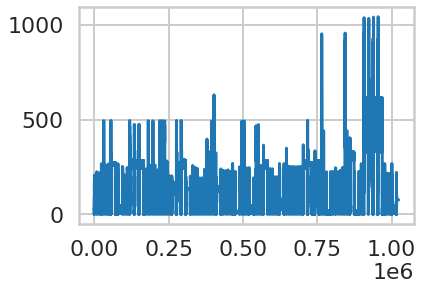

In [ ]:
submission['yield'].plot()

In [ ]:
#Converting the Dataframe to a csv file.

In [ ]:
submission.to_csv('/content/drive/MyDrive/final hackathon/sample_submission-1646898326432-1664166963268.csv', index = None)

In [ ]:
sample = pd.read_csv("/content/drive/MyDrive/final hackathon/sample_submission-1646898326432-1664166963268.csv")

In [ ]:
sample.head()

,id,yield
0,0,1.090
1,129,3.093
2,258,2.058
3,387,2.058
4,516,16.537


In [ ]:
sample.isnull().sum()

id       0
yield    0
dtype: int64

In [ ]:
sample.tail()

,id,yield
1023431,1014971,76.616
1023432,1015100,76.616
1023433,1015229,76.616
1023434,1015358,76.616
1023435,1015487,76.616
